In [2]:
import pandas as pd

internetDatos = pd.read_csv('/content/tr_endutih_usuarios_anual_2023.csv')
internetDatos = internetDatos.dropna(subset=['UPM'])
internetDatos

<ipython-input-2-2fb11432d517>:3: DtypeWarning: Columns (20,28,46,49,60,70,89,103,142,165,171,180,191,206,212) have mixed types. Specify dtype option on import or set low_memory=False.
  internetDatos = pd.read_csv('/content/tr_endutih_usuarios_anual_2023.csv')


,UPM,VIV_SEL,HOGAR,NUM_REN,EDAD,P6_1,P6_2_1,P6_2_2,P6_2_3,P6_3,...,UPM_DIS,EST_DIS,DOMINIO,TLOC,ESTRATO,PAREN,SEXO,NIVEL,GRADO,ENT
0,600916.0,2.0,1.0,2.0,34.0,1.0,2.0,1.0,1.0,NaN,...,1606.0,59.0,U,1.0,3.0,2.0,2.0,8.0,4.0,6.0
1,601125.0,1.0,1.0,1.0,46.0,1.0,1.0,1.0,2.0,NaN,...,1651.0,60.0,U,1.0,4.0,1.0,1.0,10.0,2.0,6.0
2,1408859.0,1.0,1.0,1.0,27.0,1.0,1.0,1.0,1.0,NaN,...,3677.0,137.0,U,1.0,4.0,1.0,1.0,8.0,4.0,14.0
3,3102089.0,2.0,1.0,1.0,37.0,1.0,2.0,1.0,1.0,NaN,...,7946.0,329.0,U,1.0,4.0,1.0,1.0,10.0,2.0,31.0
4,2300283.0,4.0,1.0,1.0,21.0,1.0,1.0,2.0,2.0,NaN,...,5752.0,246.0,U,1.0,2.0,1.0,1.0,8.0,4.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58917,3260771.0,15.0,1.0,3.0,9.0,2.0,NaN,NaN,NaN,2.0,...,8236.0,338.0,R,4.0,2.0,3.0,1.0,2.0,2.0,32.0
58918,3260771.0,17.0,1.0,3.0,16.0,2.0,NaN,NaN,NaN,1.0,...,8236.0,338.0,R,4.0,2.0,3.0,2.0,6.0,1.0,32.0
58919,3260771.0,18.0,1.0,1.0,61.0,2.0,NaN,NaN,NaN,2.0,...,8236.0,338.0,R,4.0,2.0,1.0,2.0,2.0,6.0,32.0
58920,3260771.0,20.0,1.0,4.0,93.0,2.0,NaN,NaN,NaN,6.0,...,8236.0,338.0,R,4.0,2.0,5.0,2.0,0.0,0.0,32.0


In [3]:
#¿Qué compran los regulares?
categorias= ['libros','música','computadoras/laptops/tablets', 'celulares o accesorios', 'programas/apps', 'alimentos/bebidas', 'eventos entretenimiento', 'productos de viaje', 'servicios hospedaje', 'aparatos electrónicos', 'productos higiene personal/cosméticos', 'artículo uso personal/ropa', 'artículos del hogar', 'vehiculos/refracciones', 'productos financieros', 'videojuegos', 'artículos de salud', 'equipo fotográfico', 'servicio de transporte', 'otro producto']
preguntaCategorias = [f"P7_24_{i}" for i in range(1, 21)]
numCompradores = internetDatos[internetDatos['P7_21'] == 1].shape[0]
numRegulares = internetDatos[(internetDatos['P7_23'].isin([1, 2, 3, 4])) & (internetDatos['P7_21'] == 1)].shape[0]
#print(f"{round((numRegulares/numCompradores)*100,2)}% son regulares")
print("compradores regulares")
for i, categoria in enumerate(categorias):
  pregunta = preguntaCategorias[i]
  count = internetDatos[(internetDatos['P7_23'].isin([1, 2, 3, 4])) & (internetDatos[pregunta] == 1)].shape[0]
  porcentaje = round((count/numRegulares)*100, 2)
  print(f"{categoria}: {porcentaje}% ")
print("")
print("compradores no regulares")
noRegulares = internetDatos[(internetDatos['P7_23'].isin([6])) & (internetDatos['P7_21'] == 1)].shape[0]
for i, categoria in enumerate(categorias):
  pregunta = preguntaCategorias[i]
  count = internetDatos[(internetDatos['P7_23'].isin([6])) & (internetDatos[pregunta] == 1)].shape[0]
  porcentaje = round((count/noRegulares)*100, 2)
  print(f"{categoria}: {porcentaje}% ")

print("")
print("compradores total")
for i, categoria in enumerate(categorias):
  pregunta = preguntaCategorias[i]
  count = internetDatos[(internetDatos['P7_23'].isin([1,2,3,4,5,6])) & (internetDatos[pregunta] == 1)].shape[0]
  porcentaje = round((count/numCompradores)*100, 2)
  print(f"{categoria}: {porcentaje}% ")

compradores regulares
libros: 20.17% 
música: 17.88% 
computadoras/laptops/tablets: 9.43% 
celulares o accesorios: 33.49% 
programas/apps: 19.07% 
alimentos/bebidas: 43.41% 
eventos entretenimiento: 29.05% 
productos de viaje: 26.13% 
servicios hospedaje: 23.76% 
aparatos electrónicos: 24.87% 
productos higiene personal/cosméticos: 48.62% 
artículo uso personal/ropa: 77.85% 
artículos del hogar: 52.85% 
vehiculos/refracciones: 21.46% 
productos financieros: 6.13% 
videojuegos: 10.86% 
artículos de salud: 24.82% 
equipo fotográfico: 4.82% 
servicio de transporte: 35.72% 
otro producto: 0.61% 

compradores no regulares
libros: 6.7% 
música: 5.22% 
computadoras/laptops/tablets: 3.46% 
celulares o accesorios: 15.17% 
programas/apps: 5.22% 
alimentos/bebidas: 13.62% 
eventos entretenimiento: 6.99% 
productos de viaje: 6.28% 
servicios hospedaje: 4.87% 
aparatos electrónicos: 10.73% 
productos higiene personal/cosméticos: 15.95% 
artículo uso personal/ropa: 48.91% 
artículos del hogar: 22.44

<ipython-input-5-02831797c585>:3: DtypeWarning: Columns (20,28,46,49,60,70,89,103,142,165,171,180,191,206,212) have mixed types. Specify dtype option on import or set low_memory=False.
  internetDatos = pd.read_csv('/content/tr_endutih_usuarios_anual_2023.csv')


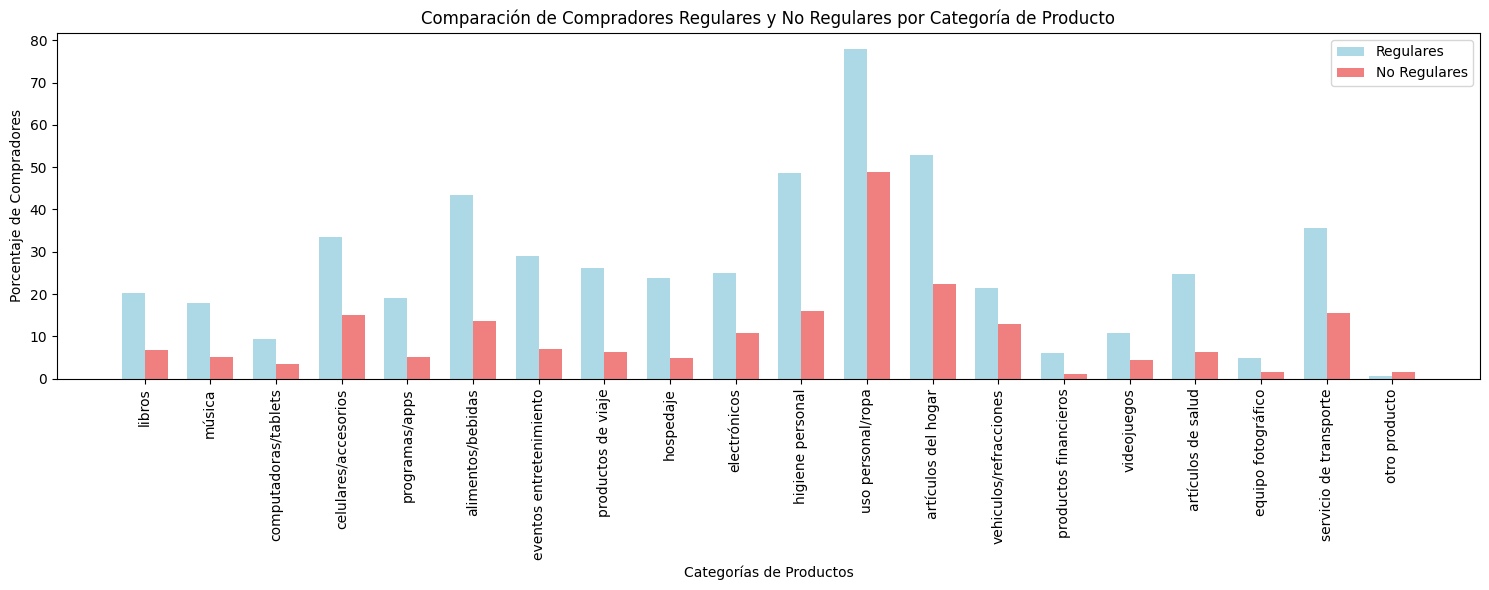

In [5]:
import matplotlib.pyplot as plt

internetDatos = pd.read_csv('/content/tr_endutih_usuarios_anual_2023.csv')
internetDatos = internetDatos.dropna(subset=['UPM'])

categorias= ['libros','música','computadoras/tablets', 'celulares/accesorios', 'programas/apps', 'alimentos/bebidas', 'eventos entretenimiento', 'productos de viaje', 'hospedaje', 'electrónicos', 'higiene personal', 'uso personal/ropa', 'artículos del hogar', 'vehiculos/refracciones', 'productos financieros', 'videojuegos', 'artículos de salud', 'equipo fotográfico', 'servicio de transporte', 'otro producto']
preguntaCategorias = [f"P7_24_{i}" for i in range(1, 21)]

numCompradores = internetDatos[internetDatos['P7_21'] == 1].shape[0]
numRegulares = internetDatos[(internetDatos['P7_23'].isin([1, 2, 3, 4])) & (internetDatos['P7_21'] == 1)].shape[0]
noRegulares = internetDatos[(internetDatos['P7_23'].isin([6])) & (internetDatos['P7_21'] == 1)].shape[0]

regulares_porcentaje = []
no_regulares_porcentaje = []

for i, categoria in enumerate(categorias):
  pregunta = preguntaCategorias[i]
  count_regulares = internetDatos[(internetDatos['P7_23'].isin([1, 2, 3, 4])) & (internetDatos[pregunta] == 1)].shape[0]
  count_no_regulares = internetDatos[(internetDatos['P7_23'].isin([6])) & (internetDatos[pregunta] == 1)].shape[0]

  porcentaje_regulares = round((count_regulares/numRegulares)*100, 2)
  porcentaje_no_regulares = round((count_no_regulares/noRegulares)*100, 2)

  regulares_porcentaje.append(porcentaje_regulares)
  no_regulares_porcentaje.append(porcentaje_no_regulares)

x = range(len(categorias))
width = 0.35
plt.rcParams['font.family'] = 'sans-serif'  # Change to an available font

#numRopa = internetDatos[(internetDatos['P7_21'] == 1) & internetDatos['P7_24_12'] == 1].shape[0]
#count_mujeres = internetDatos[(internetDatos['P7_21'] == 1) & (internetDatos['P7_24_12'] == 1) & (internetDatos['SEXO'] == 2)].shape[0]
#porcentaje_mujeres = round((count_mujeres/numRopa)*100, 2)
#print(f"mujeres {porcentaje_mujeres}")

plt.figure(figsize=(15, 6))
plt.bar(x, regulares_porcentaje, width, label='Regulares', color='lightblue')
plt.bar([i + width for i in x], no_regulares_porcentaje, width, label='No Regulares', color='lightcoral')

plt.xlabel('Categorías de Productos')
plt.ylabel('Porcentaje de Compradores')
plt.title('Comparación de Compradores Regulares y No Regulares por Categoría de Producto')
plt.xticks([i + width / 2 for i in x], categorias, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

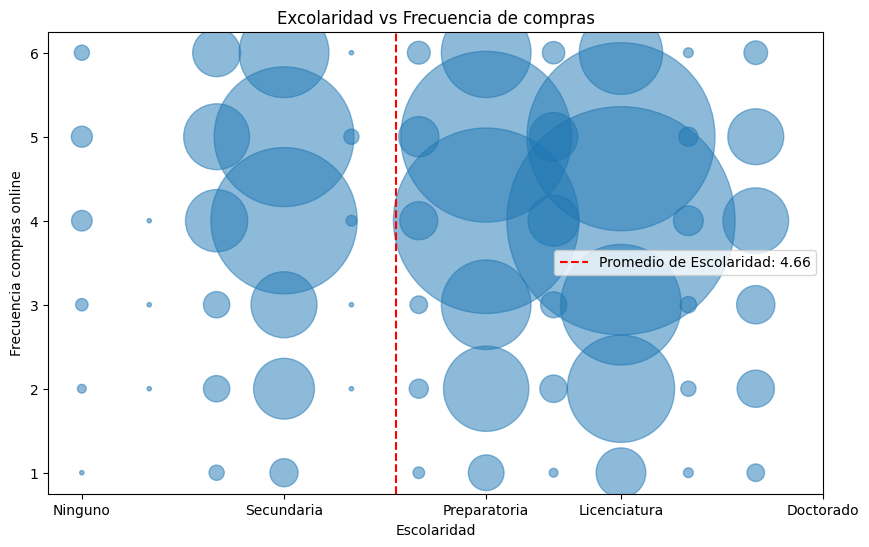

In [6]:
average_nivel = internetDatos['NIVEL'].mean()

internetDatos['NIVEL'] = internetDatos['NIVEL'].fillna(0).replace(99, 0)
internetDatos = internetDatos[internetDatos['NIVEL'].between(0, 10)]
internetDatos = internetDatos[internetDatos['P7_23'].between(1, 6)]
counts = internetDatos.groupby(['NIVEL', 'P7_23']).size().reset_index(name='counts')
plt.figure(figsize=(10, 6))
plt.scatter(counts['NIVEL'], counts['P7_23'], s=counts['counts'] * 10, alpha=0.5)
plt.xlabel('Escolaridad')
plt.ylabel('Frecuencia compras online')
plt.title('Excolaridad vs Frecuencia de compras')

escolaridad_labels = {
    0: 'Ninguno',
    3: 'Secundaria',
    6: 'Preparatoria',
    8: 'Licenciatura',
    11: 'Doctorado'
}

tick_locations = list(escolaridad_labels.keys())
tick_labels = list(escolaridad_labels.values())
plt.xticks(tick_locations, tick_labels)
plt.axvline(x=average_nivel, color='red', linestyle='--', label=f'Promedio de Escolaridad: {average_nivel:.2f}')
plt.legend()
plt.show()

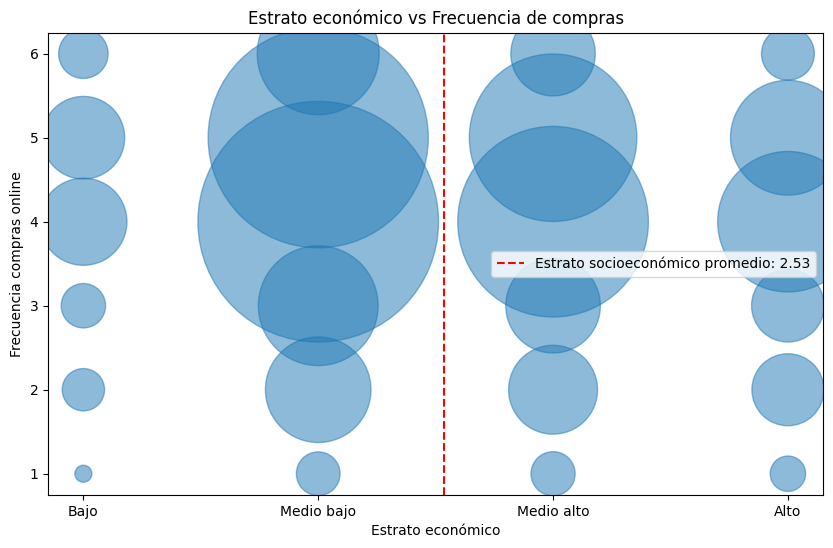

In [7]:
average_estrato = internetDatos['ESTRATO'].mean()

internetDatos = internetDatos[internetDatos['ESTRATO'].between(1, 4)]
internetDatos = internetDatos[internetDatos['P7_23'].between(1, 6)]
counts = internetDatos.groupby(['ESTRATO', 'P7_23']).size().reset_index(name='counts')
plt.figure(figsize=(10, 6))
plt.scatter(counts['ESTRATO'], counts['P7_23'], s=counts['counts'] * 10, alpha=0.5)
plt.xlabel('Estrato económico')
plt.ylabel('Frecuencia compras online')
plt.title('Estrato económico vs Frecuencia de compras')

escolaridad_labels = {
    1: 'Bajo',
    2: 'Medio bajo',
    3: 'Medio alto',
    4: 'Alto',
}

tick_locations = list(escolaridad_labels.keys())
tick_labels = list(escolaridad_labels.values())
plt.xticks(tick_locations, tick_labels)
plt.axvline(x=average_estrato, color='red', linestyle='--', label=f'Estrato socioeconómico promedio: {average_estrato:.2f}')
plt.legend()
plt.show()

In [8]:
internetDatos = pd.read_csv('/content/tr_endutih_usuarios_anual_2023.csv')
internetDatos = internetDatos.dropna(subset=['UPM'])

estratos = ['Bajo','Medio bajo','Medio alto', 'Alto']

numCompradores = internetDatos[internetDatos['P7_21'] == 1].shape[0]
dicc_estratos = {}
promedios = []

for i, estrato in enumerate(estratos):
  count_estrato = internetDatos[(internetDatos['P7_21'] == 1) & (internetDatos['ESTRATO'] == i+1)].shape[0]
  dicc_estratos[f"{estratos[i]}"] = []
  for j in range(1,7):
    count_estrato_frecuencia = internetDatos[(internetDatos['P7_21'] == 1) & (internetDatos['P7_23'] == j) & (internetDatos['ESTRATO'] == i+1)].shape[0]
    porcentaje_estrato_frecuencia = round((count_estrato_frecuencia/count_estrato)*100, 2)
    dicc_estratos[f"{estratos[i]}"].append(porcentaje_estrato_frecuencia)
dicc_estratos

<ipython-input-8-50768fde03ed>:1: DtypeWarning: Columns (20,28,46,49,60,70,89,103,142,165,171,180,191,206,212) have mixed types. Specify dtype option on import or set low_memory=False.
  internetDatos = pd.read_csv('/content/tr_endutih_usuarios_anual_2023.csv')


{'Bajo': [1.38, 8.64, 9.47, 36.31, 32.54, 11.67],
 'Medio bajo': [1.28, 7.54, 9.67, 38.94, 32.58, 9.99],
 'Medio alto': [2.2, 8.75, 10.0, 40.12, 31.07, 7.86],
 'Alto': [2.67, 10.88, 11.39, 41.43, 27.77, 5.86]}

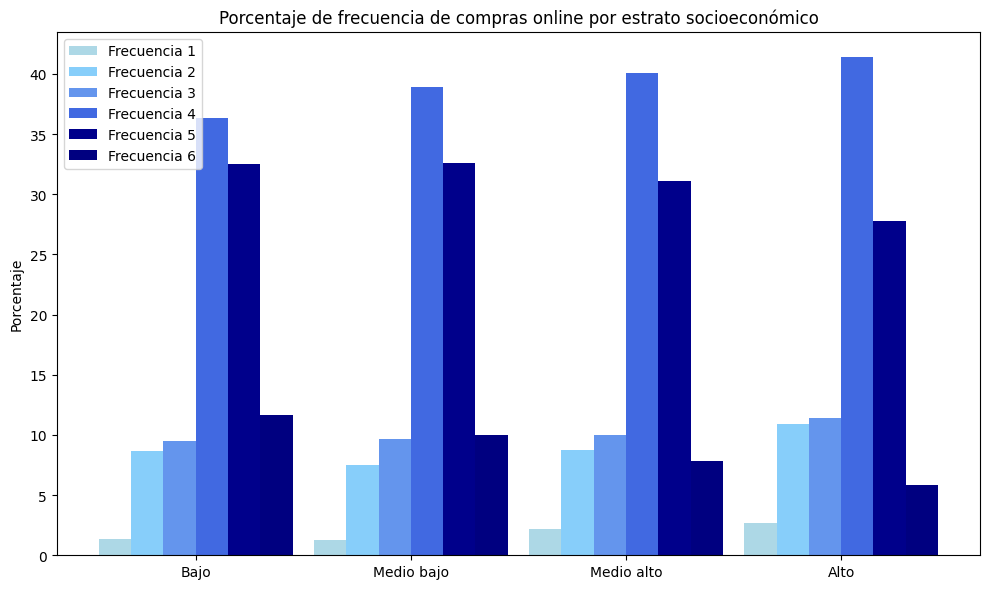

In [9]:
import numpy as np

estratos = list(dicc_estratos.keys())
frecuencias = list(range(1, 7))
x = np.arange(len(estratos))
width = 0.15
fig, ax = plt.subplots(figsize=(10, 6))


blue_hues = ['#ADD8E6', '#87CEFA', '#6495ED', '#4169E1', '#00008B', '#000080']

for i, frecuencia in enumerate(frecuencias):
  porcentajes = [dicc_estratos[estrato][i] for estrato in estratos]
  rects = ax.bar(x + (i - 2.5) * width, porcentajes, width, label=f'Frecuencia {frecuencia}', color=blue_hues[i])

ax.set_ylabel('Porcentaje')
ax.set_title('Porcentaje de frecuencia de compras online por estrato socioeconómico')
ax.set_xticks(x)
ax.set_xticklabels(estratos)
ax.legend(loc='upper left')
fig.tight_layout()
plt.show()

In [67]:
internetDatos['NIVEL'] = internetDatos['NIVEL'].fillna(0).replace(99, 0)
internetDatos = internetDatos[internetDatos['NIVEL'].between(0, 10)]

def compare_category(pregunta, categoria, lista):
  max = 0
  maxIndex = 0
  for i in range(len(lista)):
    count = internetDatos[(internetDatos['P7_21'] == 1) & (internetDatos[pregunta] == lista[i]) & (internetDatos[categoria] == 1)].shape[0]
    if count > max:
      max = count
      maxIndex = lista[i]
  return maxIndex

def compare_all(preguntas, categoria, listas):
  respuestas = []
  diccionario = {}
  for i in range(len(preguntas)):
    diccionario[preguntas[i]] = compare_category(preguntas[i], categoria, listas[i])
  return diccionario

preguntas = ['DOMINIO', 'TLOC', 'ESTRATO', 'PAREN', 'SEXO', 'NIVEL', 'ENT']
listas = [['U', 'R'], list(range(1, 5)), list(range(1, 5)), list(range(1, 7)), [1,2], list(range(0, 12)), list(range(1, 33))]
'''
DOMINIO: U=urbano, R=Rural
TLOC: 1=100,000 y más, 2=15,000 a 99,999, 3=2,500 a 14,999, 4= menor a 2,500
ESTRATO: 1=Bajo, 2=Medio bajo, 3=Medio alto, 4=Alto
PAREN: 1=Jefe(a), 2=Pareja, 3=Hijo(a), 4=Nieto(a), 5=Otro 6=Sin parentesco
SEXO: 1=Hombre, 2=Mujer
NIVEL: 0=Ninguno, 1=Preescolar, 2=Primaria, 3=Secundaria, 04=Normal básica,
       5=Estudio técnico secundaria, 6=Preparatoria
       7=Estudio técnico superior con preparatoria, 8=Licenciatura,
       9=Especialidad, 10 Maestríaa, 11=Doctorado, 99=No sabe
ENT: 1=Aguascalientes, 2=Baja California, 3=Baja California Sur, 4=Campeche
     5=Coahuila de Zaragoza, 6=Colima, 7=Chiapas, 8=Chihuahua, 9=Ciudad de México
     10=Durango, 11=Guanajuato, 12=Guerrero, 13=Hidalgo, 14=Jalisco, 15=México
     16=Michoacán de Ocampo, 17=Morelos, 18=Nayarit, 19=Nuevo León, 20=Oaxaca
     21=Puebla, 22=Querétaro, 23=Quintana Roo, 24=San Luis Potosí, 25=Sinaloa
     26=Sonora, 27=Tabasco, 28=Tamaulipas, 29=Tlaxcala,
     30=Veracruz de Ignacio de la Llave, 31=Yucatán, 32=Zacatecas
'''

categorias= ['libros','música','computadoras/laptops/tablets', 'celulares o accesorios', 'programas/apps', 'alimentos/bebidas', 'eventos entretenimiento', 'productos de viaje', 'servicios hospedaje', 'aparatos electrónicos', 'productos higiene personal/cosméticos', 'artículo uso personal/ropa', 'artículos del hogar', 'vehiculos/refracciones', 'productos financieros', 'videojuegos', 'artículos de salud', 'equipo fotográfico', 'servicio de transporte', 'otro producto']
preguntaCategorias = [f"P7_24_{i}" for i in range(1, 21)]
print("general")
print(compare_all(preguntas, 'P7_21', listas))

for i in range(len(categorias)):
  print(categorias[i])
  print(compare_all(preguntas, preguntaCategorias[i], listas))

general
{'DOMINIO': 'U', 'TLOC': 1, 'ESTRATO': 2, 'PAREN': 1, 'SEXO': 1, 'NIVEL': 8, 'ENT': 3}
libros
{'DOMINIO': 'U', 'TLOC': 1, 'ESTRATO': 2, 'PAREN': 1, 'SEXO': 1, 'NIVEL': 8, 'ENT': 9}
música
{'DOMINIO': 'U', 'TLOC': 1, 'ESTRATO': 2, 'PAREN': 3, 'SEXO': 1, 'NIVEL': 8, 'ENT': 19}
computadoras/laptops/tablets
{'DOMINIO': 'U', 'TLOC': 1, 'ESTRATO': 2, 'PAREN': 1, 'SEXO': 1, 'NIVEL': 8, 'ENT': 19}
celulares o accesorios
{'DOMINIO': 'U', 'TLOC': 1, 'ESTRATO': 2, 'PAREN': 3, 'SEXO': 1, 'NIVEL': 8, 'ENT': 19}
programas/apps
{'DOMINIO': 'U', 'TLOC': 1, 'ESTRATO': 2, 'PAREN': 3, 'SEXO': 1, 'NIVEL': 8, 'ENT': 19}
alimentos/bebidas
{'DOMINIO': 'U', 'TLOC': 1, 'ESTRATO': 2, 'PAREN': 1, 'SEXO': 1, 'NIVEL': 8, 'ENT': 9}
eventos entretenimiento
{'DOMINIO': 'U', 'TLOC': 1, 'ESTRATO': 2, 'PAREN': 1, 'SEXO': 1, 'NIVEL': 8, 'ENT': 9}
productos de viaje
{'DOMINIO': 'U', 'TLOC': 1, 'ESTRATO': 2, 'PAREN': 1, 'SEXO': 1, 'NIVEL': 8, 'ENT': 3}
servicios hospedaje
{'DOMINIO': 'U', 'TLOC': 1, 'ESTRATO': 2, '

In [105]:
internetDatos['NIVEL'] = internetDatos['NIVEL'].fillna(0).replace(99, 0)
internetDatos = internetDatos[internetDatos['NIVEL'].between(0, 10)]

compran = internetDatos[internetDatos['P7_21'] == 1].shape[0]
compranComida = internetDatos[(internetDatos['P7_21'] == 1) & (internetDatos['P7_24_6'] == 1)].shape[0]
#más común: hombres
generoCompran = internetDatos[(internetDatos['P7_21'] == 1) & (internetDatos['SEXO'] == 2)].shape[0]
generoComida = internetDatos[(internetDatos['P7_21'] == 1) & (internetDatos['P7_24_6'] == 1) & (internetDatos['SEXO'] == 2)].shape[0]
#más común: urbano
dominioCompran = internetDatos[(internetDatos['P7_21'] == 1) & (internetDatos['DOMINIO'] == 'U')].shape[0]
dominioComida = internetDatos[(internetDatos['P7_21'] == 1) & (internetDatos['P7_24_6'] == 1) & (internetDatos['DOMINIO'] == 'U')].shape[0]
#más común: Medio alto
estratoCompran = internetDatos[(internetDatos['P7_21'] == 1) & (internetDatos['ESTRATO'] == 4)].shape[0]
estratoComida = internetDatos[(internetDatos['P7_21'] == 1) & (internetDatos['P7_24_6'] == 1) & (internetDatos['ESTRATO'].isin([4]))].shape[0]
#más común: Jefes
parentescoCompran = internetDatos[(internetDatos['P7_21'] == 1) & (internetDatos['PAREN'] == 1)].shape[0]
parentesco = internetDatos[(internetDatos['P7_21'] == 1) & (internetDatos['P7_24_6'] == 1) & (internetDatos['PAREN'] == 8.0)].shape[0]
#más común: Preparatoria
gradoCompran = internetDatos[(internetDatos['P7_21'] == 1) & (internetDatos['NIVEL'] == 6.0)].shape[0]
grado = internetDatos[(internetDatos['P7_21'] == 1) & (internetDatos['P7_24_6'] == 1) & (internetDatos['NIVEL'] == 8.0)].shape[0]
#más común: más de 100000 habitantes
tamanoCompran = internetDatos[(internetDatos['P7_21'] == 1) & (internetDatos['TLOC'] == 1)].shape[0]
tamano = internetDatos[(internetDatos['P7_21'] == 1) & (internetDatos['P7_24_6'] == 1) & (internetDatos['TLOC'] == 1)].shape[0]
#más común: 9 i.e. Ciudad de México
entidadCompran = internetDatos[(internetDatos['P7_21'] == 1) & (internetDatos['ENT'] == 26)].shape[0]
entidad = internetDatos[(internetDatos['P7_21'] == 1) & (internetDatos['P7_24_6'] == 1) & (internetDatos['ENT'] ==  19)].shape[0]

p_genero = round((generoComida/compranComida)*100, 2)
p_dominio = round((dominioComida/compranComida)*100, 2)
p_estrato = round((estratoComida/compranComida)*100, 2)
p_paren = round((parentesco/compranComida)*100, 2)
p_grado = round((grado/compranComida)*100, 2)
p_tloc = round((tamano/compranComida)*100, 2)
p_entidad = round((entidad/compranComida)*100, 2)

p_cgenero = round((generoCompran/compran)*100, 2)
p_cdominio = round((dominioCompran/compran)*100, 2)
p_cestrato = round((estratoCompran/compran)*100, 2)
p_cparen = round((parentescoCompran/compran)*100, 2)
p_cgrado = round((gradoCompran/compran)*100, 2)
p_ctloc = round((tamanoCompran/compran)*100, 2)
p_centidad = round((entidadCompran/compran)*100, 2)

print(p_genero, p_dominio, p_estrato, p_paren, p_grado, p_tloc, p_entidad)
print(p_cgenero, p_cdominio, p_cestrato, p_cparen, p_cgrado, p_ctloc, p_centidad)

49.14 94.51 21.51 0.0 48.71 72.52 5.72
49.63 89.22 15.44 40.0 28.69 59.65 4.09


In [106]:
#PORCENTAJE COMPRAS EN LINEA DOMINIO URBANO
compran = internetDatos[internetDatos['P7_21'] == 1].shape[0]
dominioCompran = internetDatos[(internetDatos['P7_21'] == 1) & (internetDatos['DOMINIO'] == 'U')].shape[0]
p_dominio = round((dominioComida/compranComida)*100, 2)
print(p_dominio)

94.51


<ipython-input-14-4cf6af5924da>:1: DtypeWarning: Columns (20,28,46,49,60,70,89,103,142,165,171,180,191,206,212) have mixed types. Specify dtype option on import or set low_memory=False.
  internetDatos = pd.read_csv('/content/tr_endutih_usuarios_anual_2023.csv')


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

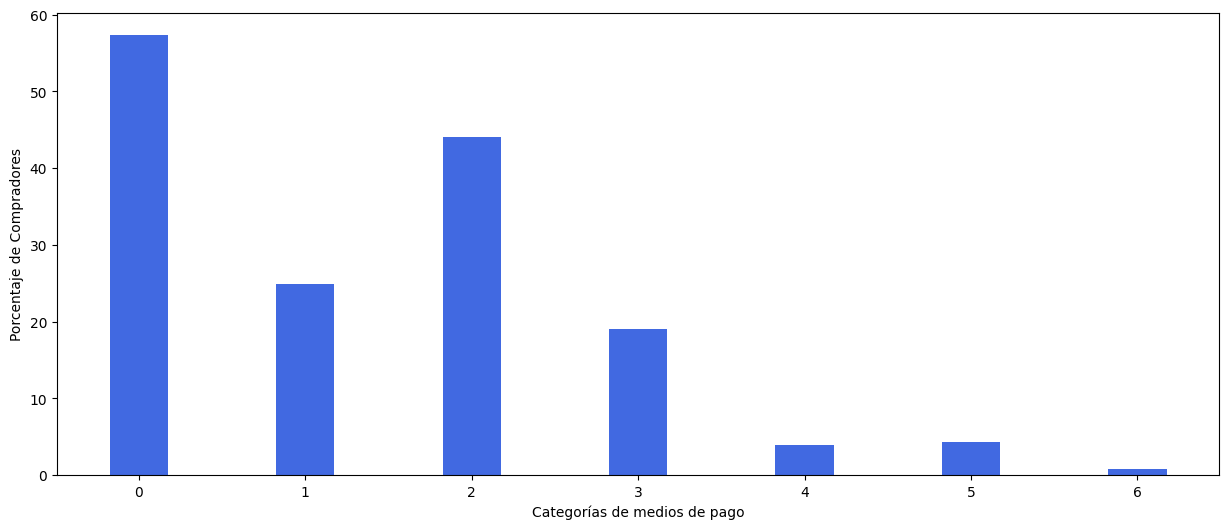

In [14]:
internetDatos = pd.read_csv('/content/tr_endutih_usuarios_anual_2023.csv')
internetDatos = internetDatos.dropna(subset=['UPM'])

categorias= ['tarjeta débito','tarjeta de crédito','transferencias bancarias', 'medios electrónicos','tarjeta regalo', 'cobro digital', 'otro medio']
preguntaCategorias = [f"P7_32_{i}" for i in range(1, 8)]

numCompradores = internetDatos[internetDatos['P7_21'] == 1].shape[0]

porcentajes = []

for i, categoria in enumerate(categorias):
  pregunta = preguntaCategorias[i]
  count = internetDatos[(internetDatos['P7_21'] == 1) & (internetDatos[pregunta] == 1)].shape[0]
  porcentaje = round((count/numCompradores)*100, 2)
  porcentajes.append(porcentaje)

x = range(len(categorias))
width = 0.35
plt.rcParams['font.family'] = 'sans-serif'

plt.figure(figsize=(15, 6))
plt.bar(x, porcentajes, width, label='Compradores', color='#4169E1')

plt.xlabel('Categorías de medios de pago')
plt.ylabel('Porcentaje de Compradores')
plt

<ipython-input-15-c3d8124cd191>:1: DtypeWarning: Columns (20,28,46,49,60,70,89,103,142,165,171,180,191,206,212) have mixed types. Specify dtype option on import or set low_memory=False.
  internetDatos = pd.read_csv('/content/tr_endutih_usuarios_anual_2023.csv')


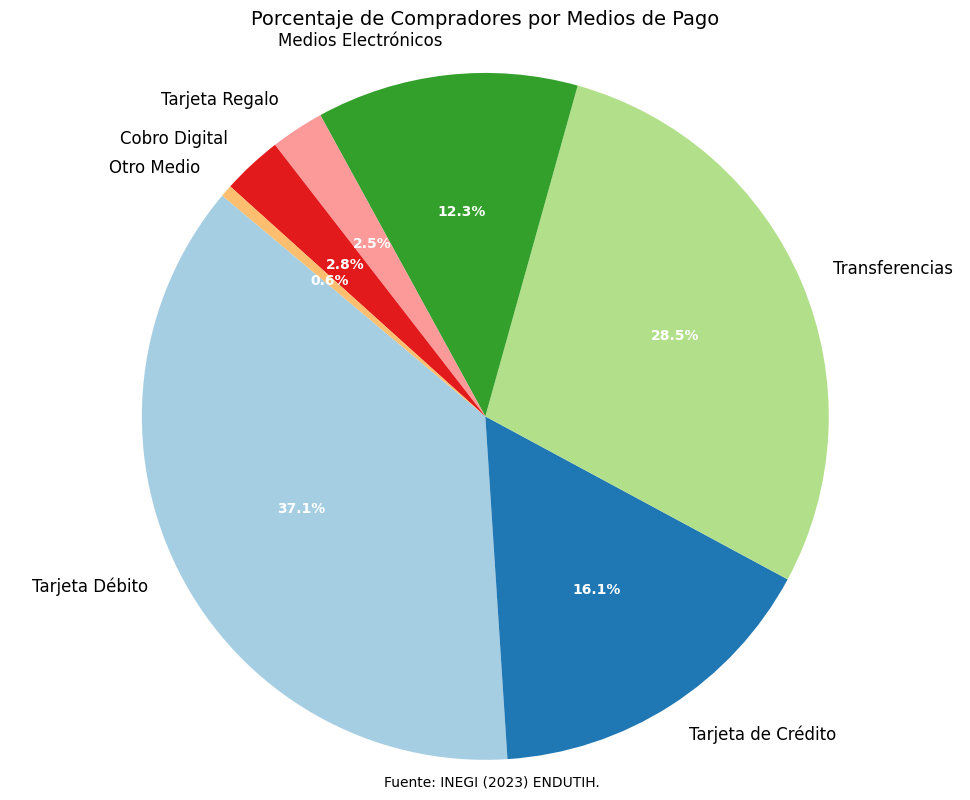

In [15]:

internetDatos = pd.read_csv('/content/tr_endutih_usuarios_anual_2023.csv')
internetDatos = internetDatos.dropna(subset=['UPM'])

categorias = ['Tarjeta Débito', 'Tarjeta de Crédito', 'Transferencias', 'Medios Electrónicos', 'Tarjeta Regalo', 'Cobro Digital', 'Otro Medio']
preguntaCategorias = [f"P7_32_{i}" for i in range(1, 8)]
numCompradores = internetDatos[internetDatos['P7_21'] == 1].shape[0]
porcentajes = []
for i, categoria in enumerate(categorias):
    pregunta = preguntaCategorias[i]
    count = internetDatos[(internetDatos['P7_21'] == 1) & (internetDatos[pregunta] == 1)].shape[0]
    porcentaje = round((count / numCompradores) * 100, 2)
    porcentajes.append(porcentaje)

plt.rcParams['font.family'] = 'sans-serif'
plt.figure(figsize=(10, 8))

wedges, texts, autotexts = plt.pie(porcentajes, labels=categorias, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.setp(autotexts, size=10, weight="bold", color="white")
plt.setp(texts, size=12)

plt.title('Porcentaje de Compradores por Medios de Pago', fontsize=14, pad=20)
plt.figtext(0.5, 0.01, 'Fuente: INEGI (2023) ENDUTIH.', ha='center', fontsize=10)

plt.axis('equal')
plt.tight_layout()
plt.show()



In [16]:
hogaresDatos = pd.read_csv('/content/tr_endutih_hogares_anual_2023.csv')
hogaresDatos = internetDatos.dropna(subset=['UPM'])
hogaresDatos

<ipython-input-16-b256a46dec9c>:1: DtypeWarning: Columns (29,94) have mixed types. Specify dtype option on import or set low_memory=False.
  hogaresDatos = pd.read_csv('/content/tr_endutih_hogares_anual_2023.csv')


,UPM,VIV_SEL,HOGAR,NUM_REN,EDAD,P6_1,P6_2_1,P6_2_2,P6_2_3,P6_3,...,UPM_DIS,EST_DIS,DOMINIO,TLOC,ESTRATO,PAREN,SEXO,NIVEL,GRADO,ENT
0,600916.0,2.0,1.0,2.0,34.0,1.0,2.0,1.0,1.0,NaN,...,1606.0,59.0,U,1.0,3.0,2.0,2.0,8.0,4.0,6.0
1,601125.0,1.0,1.0,1.0,46.0,1.0,1.0,1.0,2.0,NaN,...,1651.0,60.0,U,1.0,4.0,1.0,1.0,10.0,2.0,6.0
2,1408859.0,1.0,1.0,1.0,27.0,1.0,1.0,1.0,1.0,NaN,...,3677.0,137.0,U,1.0,4.0,1.0,1.0,8.0,4.0,14.0
3,3102089.0,2.0,1.0,1.0,37.0,1.0,2.0,1.0,1.0,NaN,...,7946.0,329.0,U,1.0,4.0,1.0,1.0,10.0,2.0,31.0
4,2300283.0,4.0,1.0,1.0,21.0,1.0,1.0,2.0,2.0,NaN,...,5752.0,246.0,U,1.0,2.0,1.0,1.0,8.0,4.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58917,3260771.0,15.0,1.0,3.0,9.0,2.0,NaN,NaN,NaN,2.0,...,8236.0,338.0,R,4.0,2.0,3.0,1.0,2.0,2.0,32.0
58918,3260771.0,17.0,1.0,3.0,16.0,2.0,NaN,NaN,NaN,1.0,...,8236.0,338.0,R,4.0,2.0,3.0,2.0,6.0,1.0,32.0
58919,3260771.0,18.0,1.0,1.0,61.0,2.0,NaN,NaN,NaN,2.0,...,8236.0,338.0,R,4.0,2.0,1.0,2.0,2.0,6.0,32.0
58920,3260771.0,20.0,1.0,4.0,93.0,2.0,NaN,NaN,NaN,6.0,...,8236.0,338.0,R,4.0,2.0,5.0,2.0,0.0,0.0,32.0


In [17]:
residentesDatos = pd.read_csv('/content/tr_endutih_residentes_anual_2023.csv')
residentesDatos = internetDatos.dropna(subset=['UPM'])
residentesDatos

,UPM,VIV_SEL,HOGAR,NUM_REN,EDAD,P6_1,P6_2_1,P6_2_2,P6_2_3,P6_3,...,UPM_DIS,EST_DIS,DOMINIO,TLOC,ESTRATO,PAREN,SEXO,NIVEL,GRADO,ENT
0,600916.0,2.0,1.0,2.0,34.0,1.0,2.0,1.0,1.0,NaN,...,1606.0,59.0,U,1.0,3.0,2.0,2.0,8.0,4.0,6.0
1,601125.0,1.0,1.0,1.0,46.0,1.0,1.0,1.0,2.0,NaN,...,1651.0,60.0,U,1.0,4.0,1.0,1.0,10.0,2.0,6.0
2,1408859.0,1.0,1.0,1.0,27.0,1.0,1.0,1.0,1.0,NaN,...,3677.0,137.0,U,1.0,4.0,1.0,1.0,8.0,4.0,14.0
3,3102089.0,2.0,1.0,1.0,37.0,1.0,2.0,1.0,1.0,NaN,...,7946.0,329.0,U,1.0,4.0,1.0,1.0,10.0,2.0,31.0
4,2300283.0,4.0,1.0,1.0,21.0,1.0,1.0,2.0,2.0,NaN,...,5752.0,246.0,U,1.0,2.0,1.0,1.0,8.0,4.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58917,3260771.0,15.0,1.0,3.0,9.0,2.0,NaN,NaN,NaN,2.0,...,8236.0,338.0,R,4.0,2.0,3.0,1.0,2.0,2.0,32.0
58918,3260771.0,17.0,1.0,3.0,16.0,2.0,NaN,NaN,NaN,1.0,...,8236.0,338.0,R,4.0,2.0,3.0,2.0,6.0,1.0,32.0
58919,3260771.0,18.0,1.0,1.0,61.0,2.0,NaN,NaN,NaN,2.0,...,8236.0,338.0,R,4.0,2.0,1.0,2.0,2.0,6.0,32.0
58920,3260771.0,20.0,1.0,4.0,93.0,2.0,NaN,NaN,NaN,6.0,...,8236.0,338.0,R,4.0,2.0,5.0,2.0,0.0,0.0,32.0
